In [1]:
import glob
import numpy as np
import pandas as pd
import os
import shutil
from PIL import Image
import matplotlib.pyplot as plt
from utils.scale_crop import scale_img, center_crop_img

np.random.seed(42)

- Download dataset under https://www.kaggle.com/c/dog-breed-identification

### Class distribution

In [2]:
# Retrieve labels
label_df = pd.read_csv('./dataset/labels.csv')

In [3]:
# Number of classes
len(label_df['breed'].unique())

120

(array([15., 22., 30., 18., 12.,  4.,  9.,  5.,  4.,  1.]),
 array([ 66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120., 126.]),
 <a list of 10 Patch objects>)

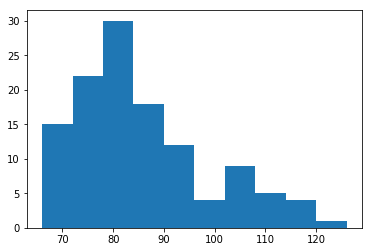

In [4]:
# Class size distribution
plt.hist(label_df.pivot_table(index='breed', aggfunc=len)['id'])

### Split data

In [5]:
# Split the data into train, validation and test sets
TRAIN_SIZE = 0.7
VALID_SIZE = 0.15

rnd = np.random.random(len(label_df.index))
train_idx = rnd < TRAIN_SIZE
valid_idx = (rnd >= TRAIN_SIZE) & (rnd < TRAIN_SIZE + VALID_SIZE)
test_idx = rnd >= TRAIN_SIZE + VALID_SIZE

label_df.loc[train_idx, 'set'] = 'train'
label_df.loc[valid_idx, 'set'] = 'valid'
label_df.loc[test_idx, 'set'] = 'test'

print(len(label_df.index))
print(label_df.head())

10222
                                 id             breed    set
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull  train
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo   test
2  001cdf01b096e06d78e9e5112d419397          pekinese  valid
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick  train
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever  train


### Image size

In [6]:
# Get size distribution
fnames = glob.glob('./dataset/train/*')
size_d = {fn: Image.open(fn).size for fn in fnames}
widths, heights = list(zip(*size_d.values()))
widths, heights = np.array(widths), np.array(heights)

(array([3.798e+03, 6.259e+03, 1.080e+02, 1.800e+01, 1.100e+01, 4.000e+00,
        1.900e+01, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([  97. ,  413.7,  730.4, 1047.1, 1363.8, 1680.5, 1997.2, 2313.9,
        2630.6, 2947.3, 3264. ]),
 <a list of 10 Patch objects>)

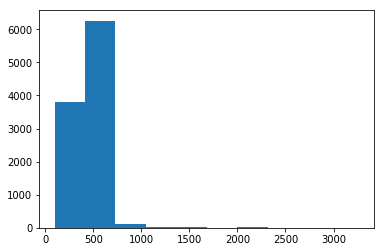

In [7]:
plt.hist(widths)

(array([ 178.,  762., 1671., 1486., 5705.,  155.,   98.,   72.,   15.,
          12.]),
 array([ 97. , 186.3, 275.6, 364.9, 454.2, 543.5, 632.8, 722.1, 811.4,
        900.7, 990. ]),
 <a list of 10 Patch objects>)

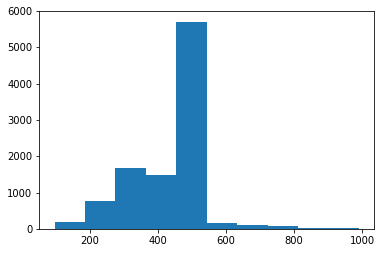

In [8]:
plt.hist(widths[widths<1000])

(array([3.595e+03, 6.395e+03, 1.500e+02, 2.800e+01, 1.800e+01, 2.000e+01,
        1.000e+01, 3.000e+00, 0.000e+00, 3.000e+00]),
 array([ 102.,  348.,  594.,  840., 1086., 1332., 1578., 1824., 2070.,
        2316., 2562.]),
 <a list of 10 Patch objects>)

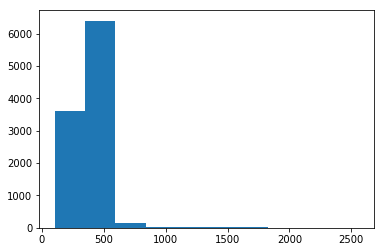

In [9]:
plt.hist(heights)

(array([ 302.,  910., 2781., 3685., 2273.,  115.,   33.,   39.,    9.,
          11.]),
 array([102. , 190.2, 278.4, 366.6, 454.8, 543. , 631.2, 719.4, 807.6,
        895.8, 984. ]),
 <a list of 10 Patch objects>)

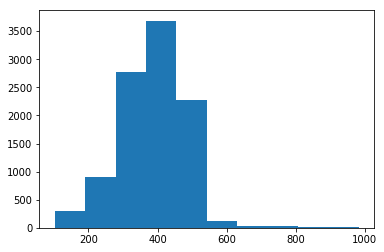

In [10]:
plt.hist(heights[heights<1000])

(500, 350)


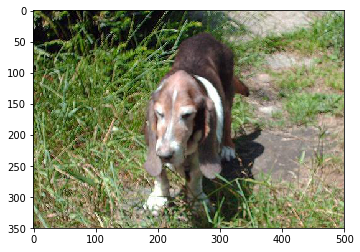

In [20]:
# Display random image
fn = np.random.choice(fnames, 1)[0]
img = Image.open(fn)

print(img.size)
plt.imshow(img)
plt.show()

(299, 299)


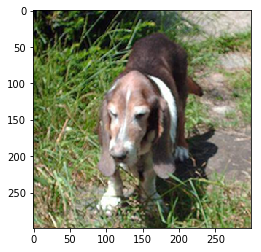

In [21]:
IMG_SHAPE = (299, 299)

img = scale_img(img, IMG_SHAPE)
img = center_crop_img(img, IMG_SHAPE)

print(img.size)
plt.imshow(img)
plt.show()

### Restructure data

In [22]:
# Remove data folder if exists
!rm -rf ./data

# Copy images to the new folder structure
all_sets = label_df['set'].unique()
all_breeds = label_df['breed'].unique()

for s in all_sets:
    for b in all_breeds:
        os.makedirs('./data/{}/{}'.format(s, b), exist_ok=True)
        ids = label_df[(label_df['set'] == s) & (label_df['breed'] == b)]['id'].unique()
        
        for i in ids:
            fn = './dataset/train/{}.jpg'.format(i)
            path = './data/{}/{}/{}.jpg'.format(s, b, i)
            
            img = Image.open(fn)
            img = scale_img(img)
            img = center_crop_img(img)
            img.save(path)

In [23]:
# Check consistency
!find ./data -type f | wc -l

   10222
